| Name | Admin No | Class | Assignment
| --- | --- | --- | --- |
| Goh Rui Zhuo | 2222329 | DAAA/2B/05 | DevOps CA1

# __Car Price Prediction__

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Problem Statement__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


This is a dataset to predict the car prices base on several different factors

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Import Libraries__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings
from termcolor import colored
warnings.filterwarnings('ignore')
import xgboost as xgb
from xgboost import XGBRegressor
import catboost as cb



In [2]:
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, KBinsDiscretizer , Normalizer
from sklearn.pipeline import Pipeline
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedKFold, learning_curve, RandomizedSearchCV,  train_test_split
from sklearn.inspection import permutation_importance
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression , Ridge , ElasticNet , Lasso
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor , RandomForestRegressor , ExtraTreesRegressor , HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif
from pandas_profiling import ProfileReport
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from scipy.stats import mstats
from sklearn.metrics import mean_absolute_error
import optuna
from optuna.samplers import TPESampler
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OneHotEncoder
random_state = 32
sns.set_style('darkgrid')


<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Import Dataset__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


In [77]:
df = pd.read_csv('train.csv')
df

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19104,Lexus,RC 350 Base,2017.0,77886.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,Black,Obsidian Black,30023
19105,Chevrolet,Camaro 2SS,2020.0,30921.0,6.2L V8 16V GDI OHV,6.2,10-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,Jet Black,Black,42500
19106,Hyundai,Palisade Calligraphy,2021.0,25490.0,3.8L V6 24V GDI DOHC,3.8,8-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,Black,Becketts Black,43999
19107,Honda,Accord Sport,2019.0,30840.0,1.5L I4 16V GDI DOHC Turbo,1.5,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Gray,White,26998


### Select Columns

Below columns was selected because of its relavancy in predicting car prices

In [13]:
selected_columns =[
    "brand",
    "year",
    "mileage",
    "engine",
    "engine_size",
    "transmission",
    "fuel_type",
    "drivetrain",
    "min_mpg",
    "damaged",
    "turbo",
    "navigation_system",
    "backup_camera",
    "first_owner",'price'
]

In [79]:
df = df[selected_columns]

In [80]:
df['Age'] = 2023 - df['year']

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Data Understanding__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              19107 non-null  object 
 1   year               19107 non-null  float64
 2   mileage            19107 non-null  float64
 3   engine             19062 non-null  object 
 4   engine_size        17860 non-null  float64
 5   transmission       19004 non-null  object 
 6   fuel_type          19107 non-null  object 
 7   drivetrain         19107 non-null  object 
 8   min_mpg            16103 non-null  float64
 9   damaged            18940 non-null  float64
 10  turbo              19107 non-null  float64
 11  navigation_system  19107 non-null  float64
 12  backup_camera      19107 non-null  float64
 13  first_owner        18803 non-null  float64
 14  price              19107 non-null  object 
 15  Age                19107 non-null  float64
dtypes: float64(10), object

<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
  <b><p style="margin: 0;">Things Observed</p></b>


<ul>
  <li>From the above dataset, we can conclude that there is some form of anomaly dtype in the files</li>
</ul>


### Null values check

Here see if the dataset contains any null values

In [82]:
df.isnull().sum()

brand                   2
year                    2
mileage                 2
engine                 47
engine_size          1249
transmission          105
fuel_type               2
drivetrain              2
min_mpg              3006
damaged               169
turbo                   2
navigation_system       2
backup_camera           2
first_owner           306
price                   2
Age                     2
dtype: int64

<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
  <b><p style="margin: 0;">Things Observed</p></b>


<ul>
    <li>From the above dataset, we can conclude that there are null values in the dataset</li>
</ul>
</div>

### Further Analysis

Here we find out how is the distribution of the data like

In [83]:
df.describe()

,year,mileage,engine_size,min_mpg,damaged,turbo,navigation_system,backup_camera,first_owner,Age
count,19107.000000,19107.000000,17860.000000,16103.000000,18940.000000,19107.000000,19107.000000,19107.000000,18803.000000,19107.000000
mean,2017.773120,47947.087403,2.973191,20.827796,0.217371,0.404250,0.508714,0.673941,0.517417,5.226880
std,4.996385,38285.061200,5.478008,6.017846,0.412468,0.490759,0.499937,0.468781,0.499710,4.996385
min,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2016.000000,19307.000000,2.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2019.000000,39141.000000,2.500000,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000
75%,2021.000000,68431.500000,3.500000,24.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,2024.000000,383614.000000,390.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.000000


<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
  <b><p style="margin: 0;">Things Observed</p></b>


<ul>
    <li>From the above dataset, we can conclude that the data are pretty ok</li>
</ul>
</div>

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Data Preprocessing (1)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


### Dropping of null values

- While imputing may be another viable option, it can result in inaccurate values produced, therefore it is best to drop the rows

In [84]:
df = df.dropna(subset=["price"])
df = df.dropna()

### Change the dtype of the price column

- As the dtype is in object we are required to change the dtype of the price column to float

In [85]:
df = df[df['price'].apply(lambda x:x.isnumeric())]
df['price'] = df['price'].astype(float)
df

,brand,year,mileage,engine,engine_size,transmission,fuel_type,drivetrain,min_mpg,damaged,turbo,navigation_system,backup_camera,first_owner,price,Age
8,Honda,2021.0,51299.0,3.5L V6 24V GDI SOHC,3.5,9-Speed Automatic,Gasoline,Four-wheel Drive,19.0,0.0,0.0,0.0,1.0,1.0,35999.0,2.0
10,Mercedes-Benz,2014.0,79279.0,4.7L V8 32V GDI DOHC Twin Turbo,4.7,7-Speed Automatic,Gasoline,Four-wheel Drive,21.0,0.0,1.0,1.0,1.0,0.0,22349.0,9.0
11,Mitsubishi,2021.0,31976.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,Gasoline,Four-wheel Drive,24.0,0.0,0.0,0.0,1.0,1.0,19499.0,2.0
12,Porsche,1994.0,92025.0,3.0L I4 16V MPFI DOHC,3.0,6-Speed Automatic,Gasoline,Rear-wheel Drive,10.0,1.0,0.0,0.0,0.0,0.0,12960.0,29.0
13,MINI,2016.0,43418.0,1.5L I3 12V GDI DOHC Turbo,1.5,6-Speed Automatic,Gasoline,Front-wheel Drive,21.0,0.0,1.0,0.0,0.0,0.0,16500.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19102,Mitsubishi,2020.0,38386.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,Gasoline,Four-wheel Drive,20.0,0.0,0.0,0.0,1.0,0.0,21525.0,3.0
19103,Volkswagen,2022.0,10708.0,2.0L I4 16V GDI DOHC Turbo,2.0,8-Speed Automatic,Gasoline,Four-wheel Drive,25.0,0.0,1.0,0.0,1.0,1.0,31684.0,1.0
19104,Lexus,2017.0,77886.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,1.0,0.0,1.0,1.0,0.0,30023.0,6.0
19105,Chevrolet,2020.0,30921.0,6.2L V8 16V GDI OHV,6.2,10-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,0.0,0.0,0.0,1.0,1.0,42500.0,3.0


<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Exploratory Data Analysis__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">

Here we will proceed to do eda on the dataset

### Analysis on categorical data

#### Define the class for it

In [86]:
class catAnalyser:
    def __init__(self):
        pass

    def barPiePlot(self, col):
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        fig.set_facecolor('lightgray')
        fig.suptitle(f'Analysis on {col}', size=20, color='darkblue')
        data = df.sort_values(by=[col])
        sns.countplot(y=col, data=data,ec = "black", palette="Set2",order = data[col].value_counts().index, ax=ax)
        plt.xlabel("Count", weight="bold", fontsize=15)
        plt.ylabel(f"{col}", weight="bold", fontsize=12)
        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width() + 0.2, p.get_y() + 0.5), fontsize=12, weight='bold')
    
        plt.show()
catFunc = catAnalyser()


#### Define the different types of columns

In [87]:
target_var = 'price'
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
cat_cols= [ col for col in df.columns if col not in binary_cols and df[col].dtype == "object"]
num_cols= [ col for col in df.columns if col not in binary_cols and df[col].dtype in ['int64', 'float64'] and col != target_var]


#### Define the key columns to analyse

In [88]:
cat_cols_eda = ["brand", "fuel_type", "drivetrain"]

In [89]:
del_cat_vars = list(set(cat_cols) - set(cat_cols_eda))
print(del_cat_vars)

['transmission', 'engine']


#### Visualising

brand


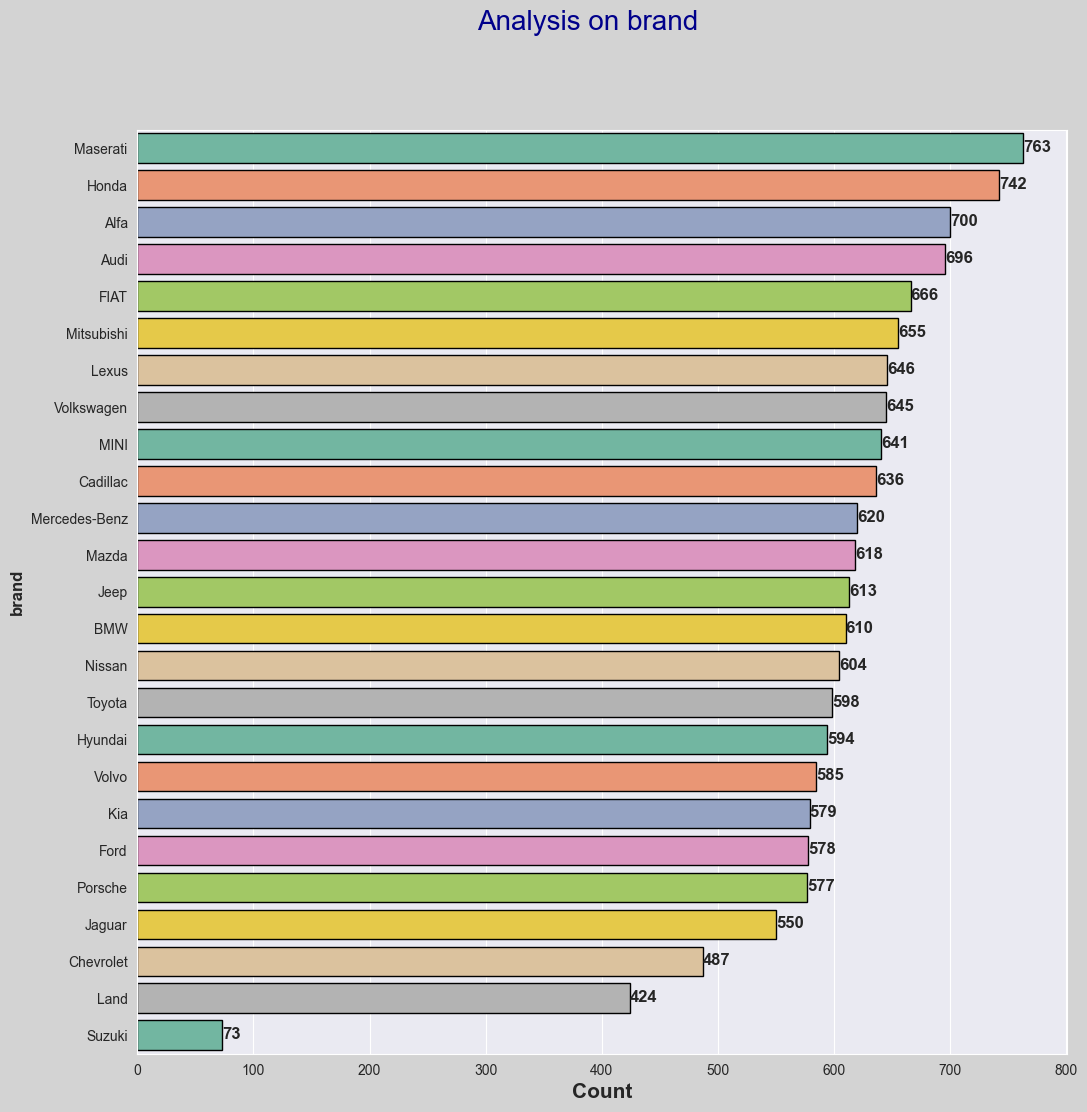

fuel_type


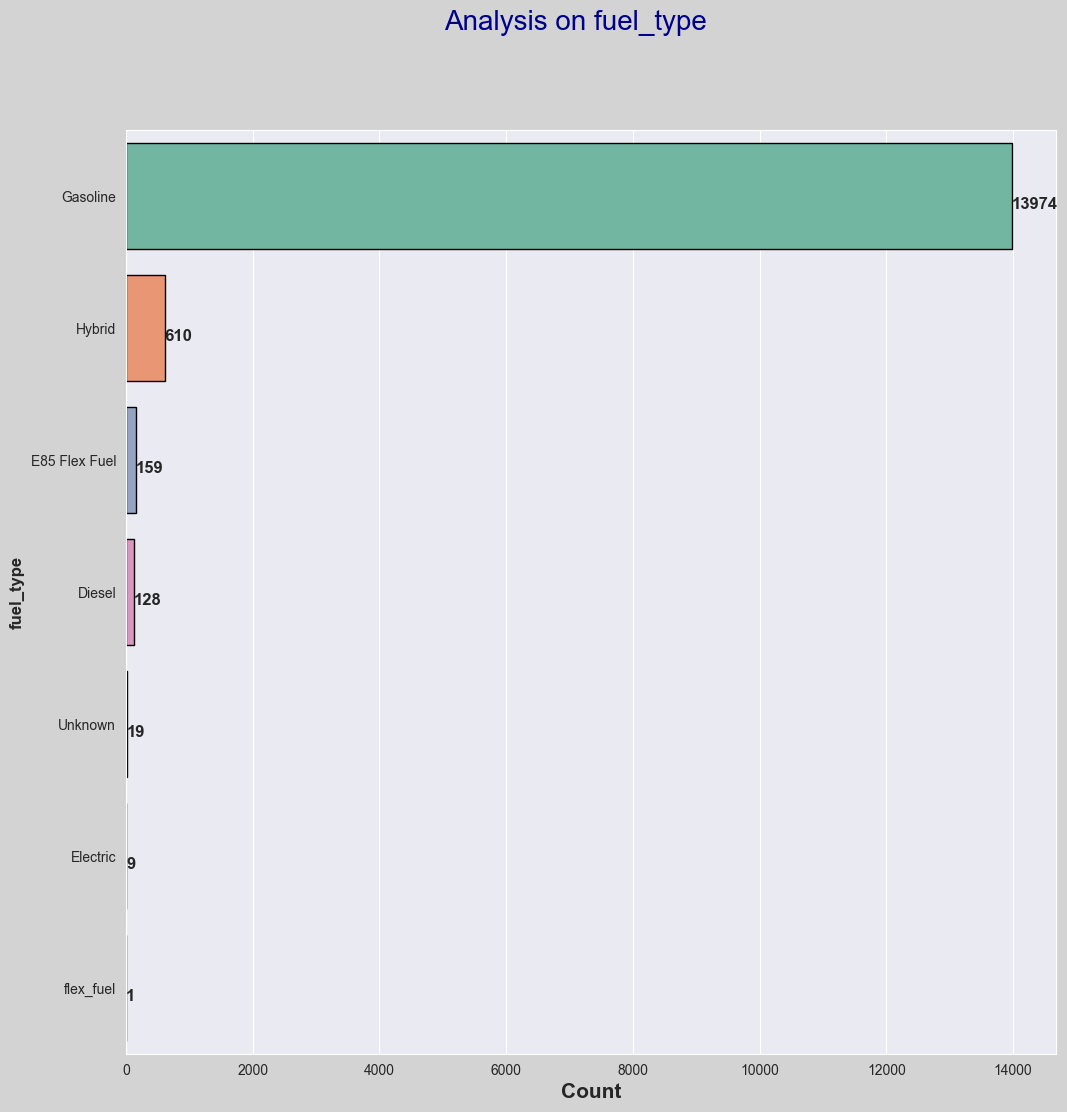

drivetrain


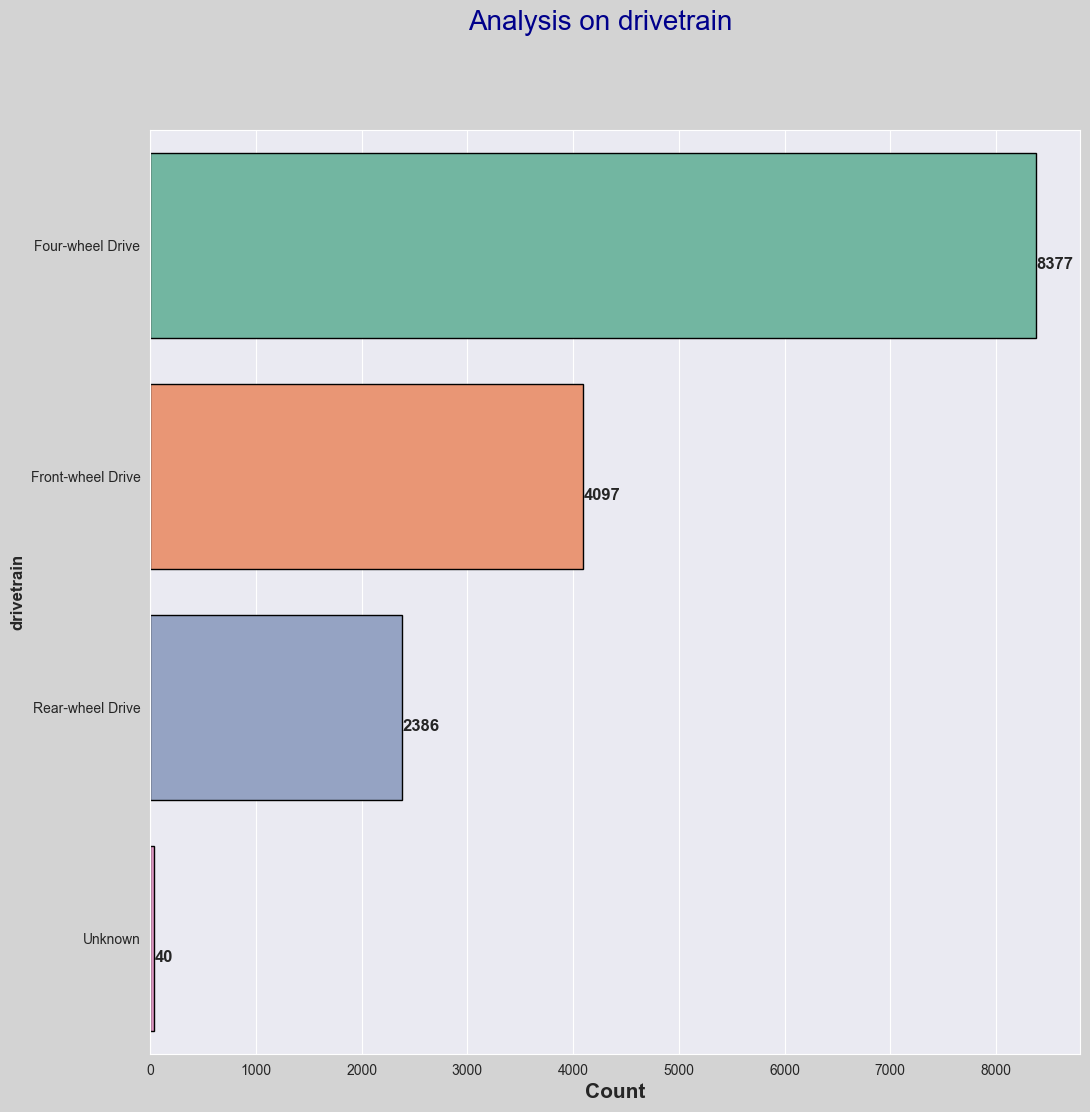

In [34]:
for col in cat_cols_eda:
    print(col)
    catFunc.barPiePlot(col)

<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> For brands, we can see that this dataset contains Maserati the most and Suzuki the least</li>
    <li> For fuel type, we can see that this dataset contains Gasoline the most and Flex type the least</li>
        <li> For fuel drivetrain, we can see that this dataset contains Four Wheel Drive the most and Unkown the least</li>
</ul>
</div>

### Analysis on numeric values

In [35]:
class numericAnalyser:
    def __init__(self):
        pass

    def numPlot(self, col):
        fig, ax = plt.subplots(2, 1, figsize=(10, 10))
        fig.suptitle(f'Analysis on {col}', size=20, color='darkblue')
        fig.set_facecolor('#C3D1D6')
        ax[0].title.set_text(f'Boxplot of {col}')
        ax[1].title.set_text(f'Distribution of {col}')
        sns.boxplot(x=df[col], ax=ax[0])
        sns.histplot(x=col,
                     data=df,
                     stat='density',
                     bins=50,
                     kde=True,
                     line_kws={'color': 'red', 'linewidth': 3}, ax=ax[1])
        plt.show()

    def target(self, col):
        fig, ax = plt.subplots(1, 1, figsize=(20, 15))
        fig.suptitle('Analysis on Target Variable', size=20, color='darkblue')
        fig.set_facecolor('#C3D1D6')
        sns.histplot(data=df, x=col, kde=True, ax=ax)
        ax.set_title("Distribution of Analysis on numeric valuesf Price")
        plt.show()


numFunc = numericAnalyser()


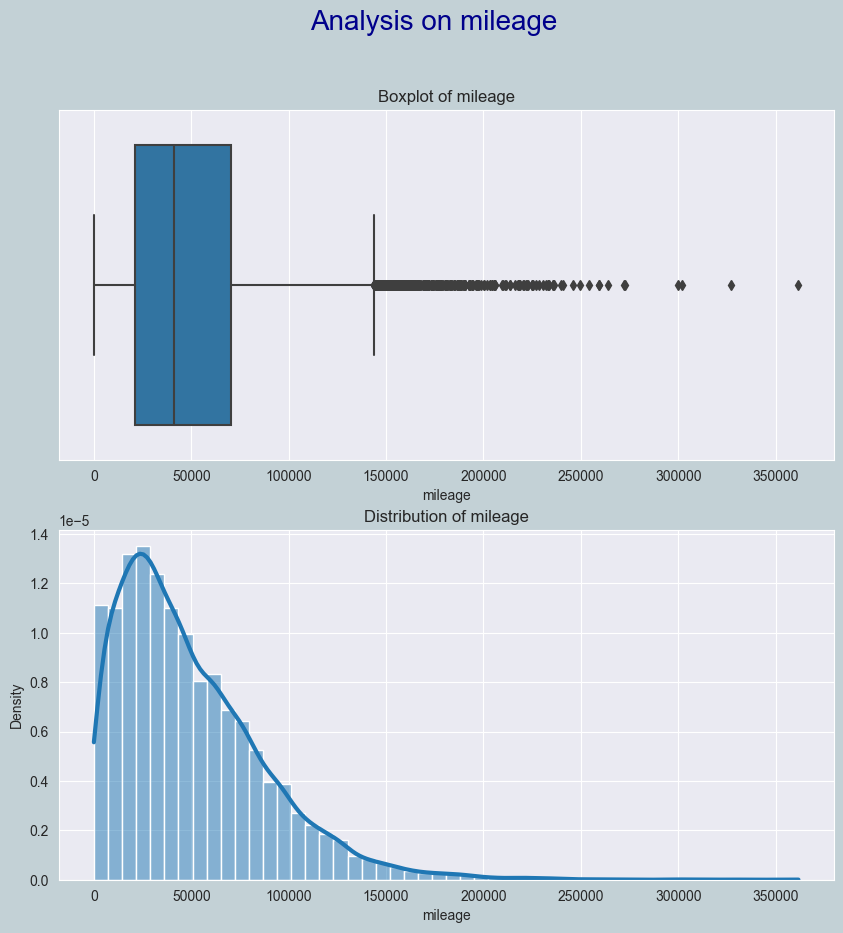

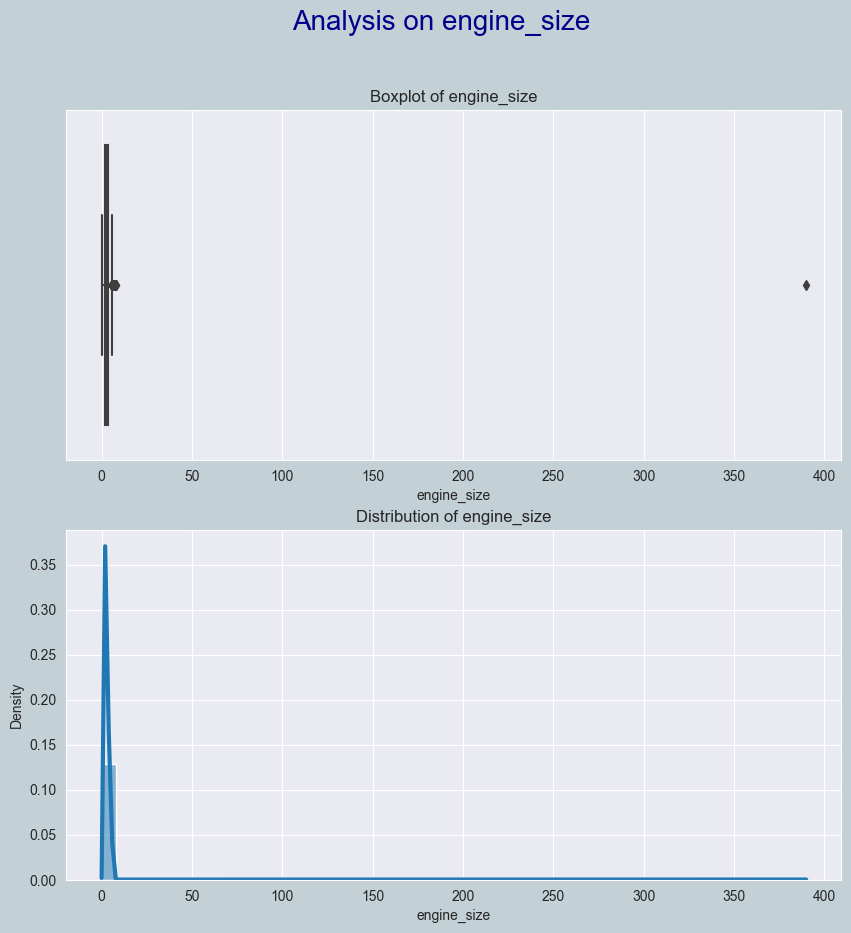

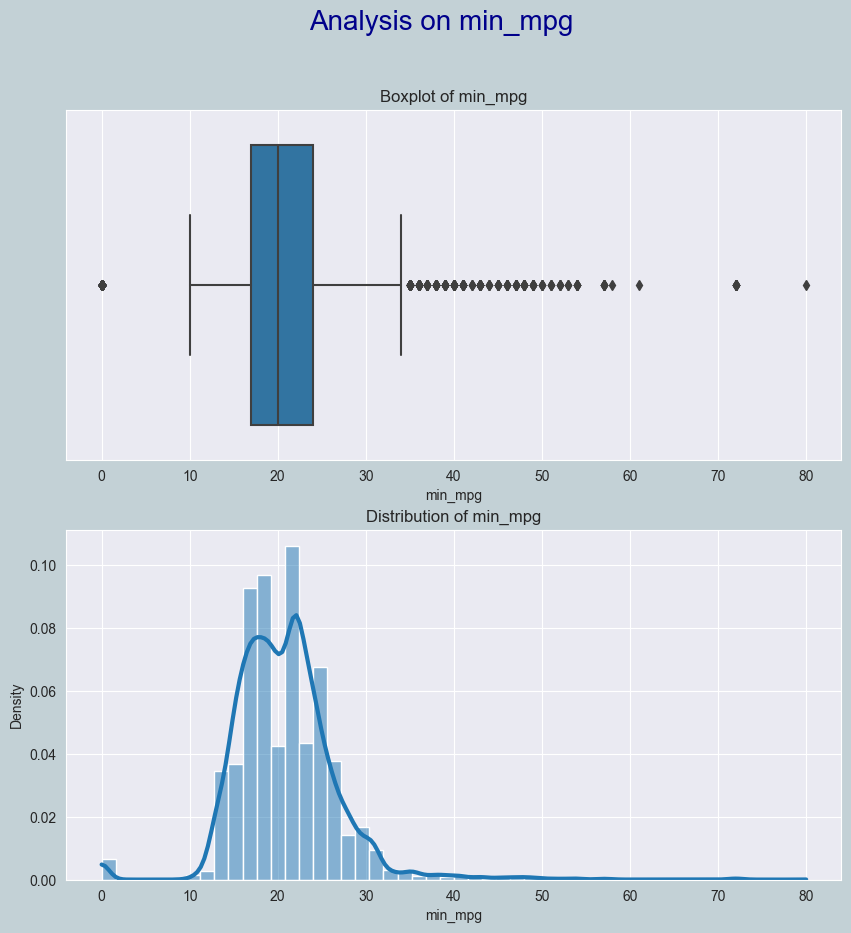

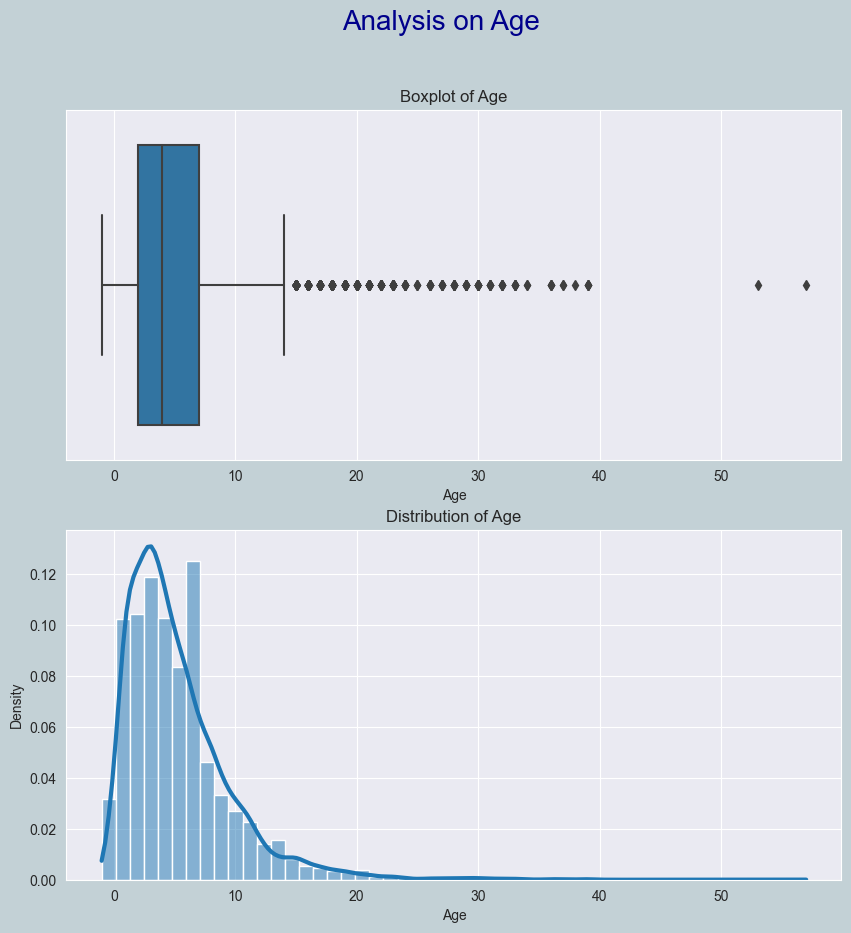

In [36]:
for col in num_cols[1:]:
    numFunc.numPlot(col)

<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> For milelage, we can see that this dataset is postiveily skewed</li>
    <li> For engine size, we can see that this dataset pretty symmetrical distribution</li>
        <li> For min mpg, we can see that it is positively skewed</li>
</ul>
</div>

### Analysis on Target Variable

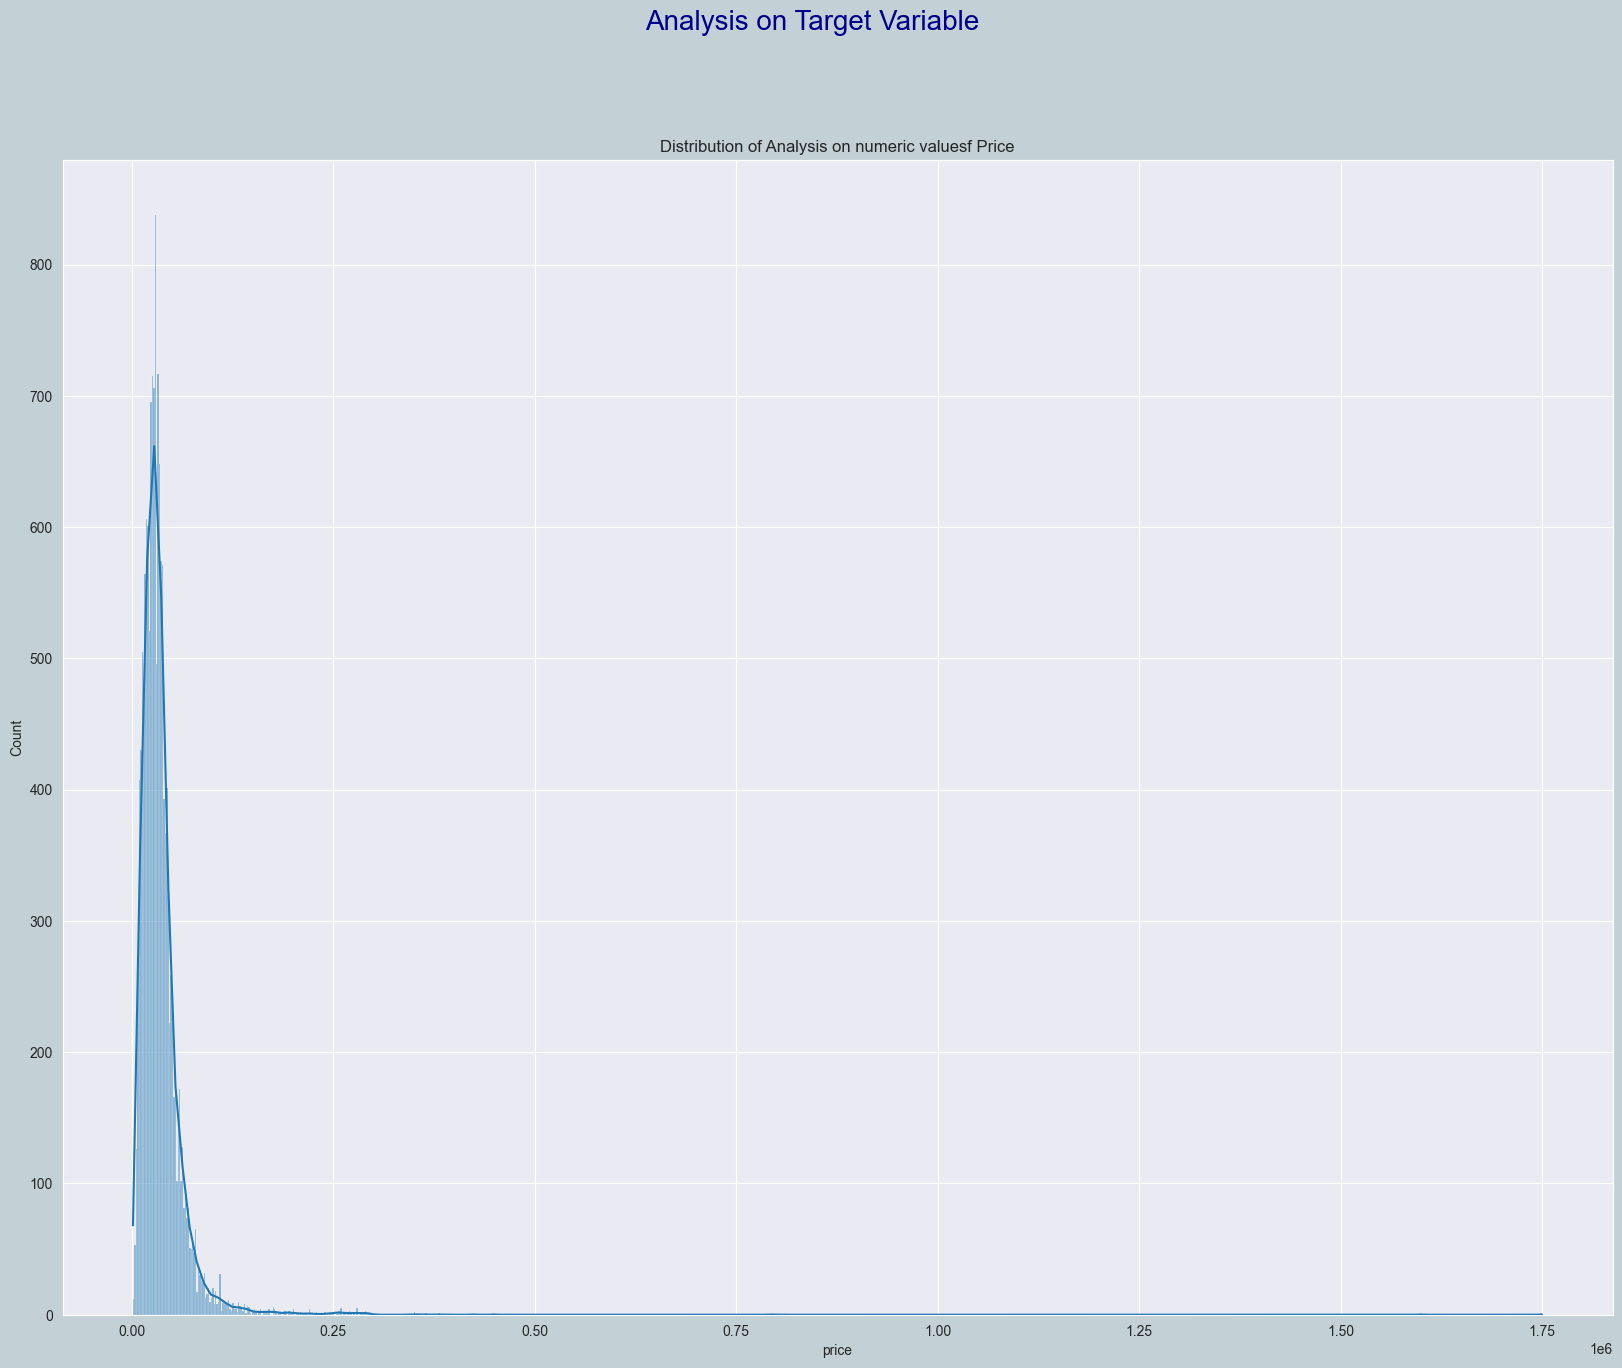

In [37]:
numFunc.target('price')

<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> For the target variable, we can see that the data contains extreme outliers
</ul>
</div>

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Data Preprocessing (2)__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


### Removing the extreme outliers in the dataset

- Engine size and Price

In [38]:
outlier_engine_size = df['engine_size'].quantile(0.999)
df = df[df['engine_size'] < outlier_engine_size]
df = df[df['price'] < df['price'].quantile(0.99)]
df

,brand,year,mileage,engine,engine_size,transmission,fuel_type,drivetrain,min_mpg,damaged,turbo,navigation_system,backup_camera,first_owner,price,Age
8,Honda,2021.0,51299.0,3.5L V6 24V GDI SOHC,3.5,9-Speed Automatic,Gasoline,Four-wheel Drive,19.0,0.0,0.0,0.0,1.0,1.0,35999.0,2.0
10,Mercedes-Benz,2014.0,79279.0,4.7L V8 32V GDI DOHC Twin Turbo,4.7,7-Speed Automatic,Gasoline,Four-wheel Drive,21.0,0.0,1.0,1.0,1.0,0.0,22349.0,9.0
11,Mitsubishi,2021.0,31976.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,Gasoline,Four-wheel Drive,24.0,0.0,0.0,0.0,1.0,1.0,19499.0,2.0
12,Porsche,1994.0,92025.0,3.0L I4 16V MPFI DOHC,3.0,6-Speed Automatic,Gasoline,Rear-wheel Drive,10.0,1.0,0.0,0.0,0.0,0.0,12960.0,29.0
13,MINI,2016.0,43418.0,1.5L I3 12V GDI DOHC Turbo,1.5,6-Speed Automatic,Gasoline,Front-wheel Drive,21.0,0.0,1.0,0.0,0.0,0.0,16500.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19102,Mitsubishi,2020.0,38386.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,Gasoline,Four-wheel Drive,20.0,0.0,0.0,0.0,1.0,0.0,21525.0,3.0
19103,Volkswagen,2022.0,10708.0,2.0L I4 16V GDI DOHC Turbo,2.0,8-Speed Automatic,Gasoline,Four-wheel Drive,25.0,0.0,1.0,0.0,1.0,1.0,31684.0,1.0
19104,Lexus,2017.0,77886.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,1.0,0.0,1.0,1.0,0.0,30023.0,6.0
19105,Chevrolet,2020.0,30921.0,6.2L V8 16V GDI OHV,6.2,10-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,0.0,0.0,0.0,1.0,1.0,42500.0,3.0


### Analyse the updated price column

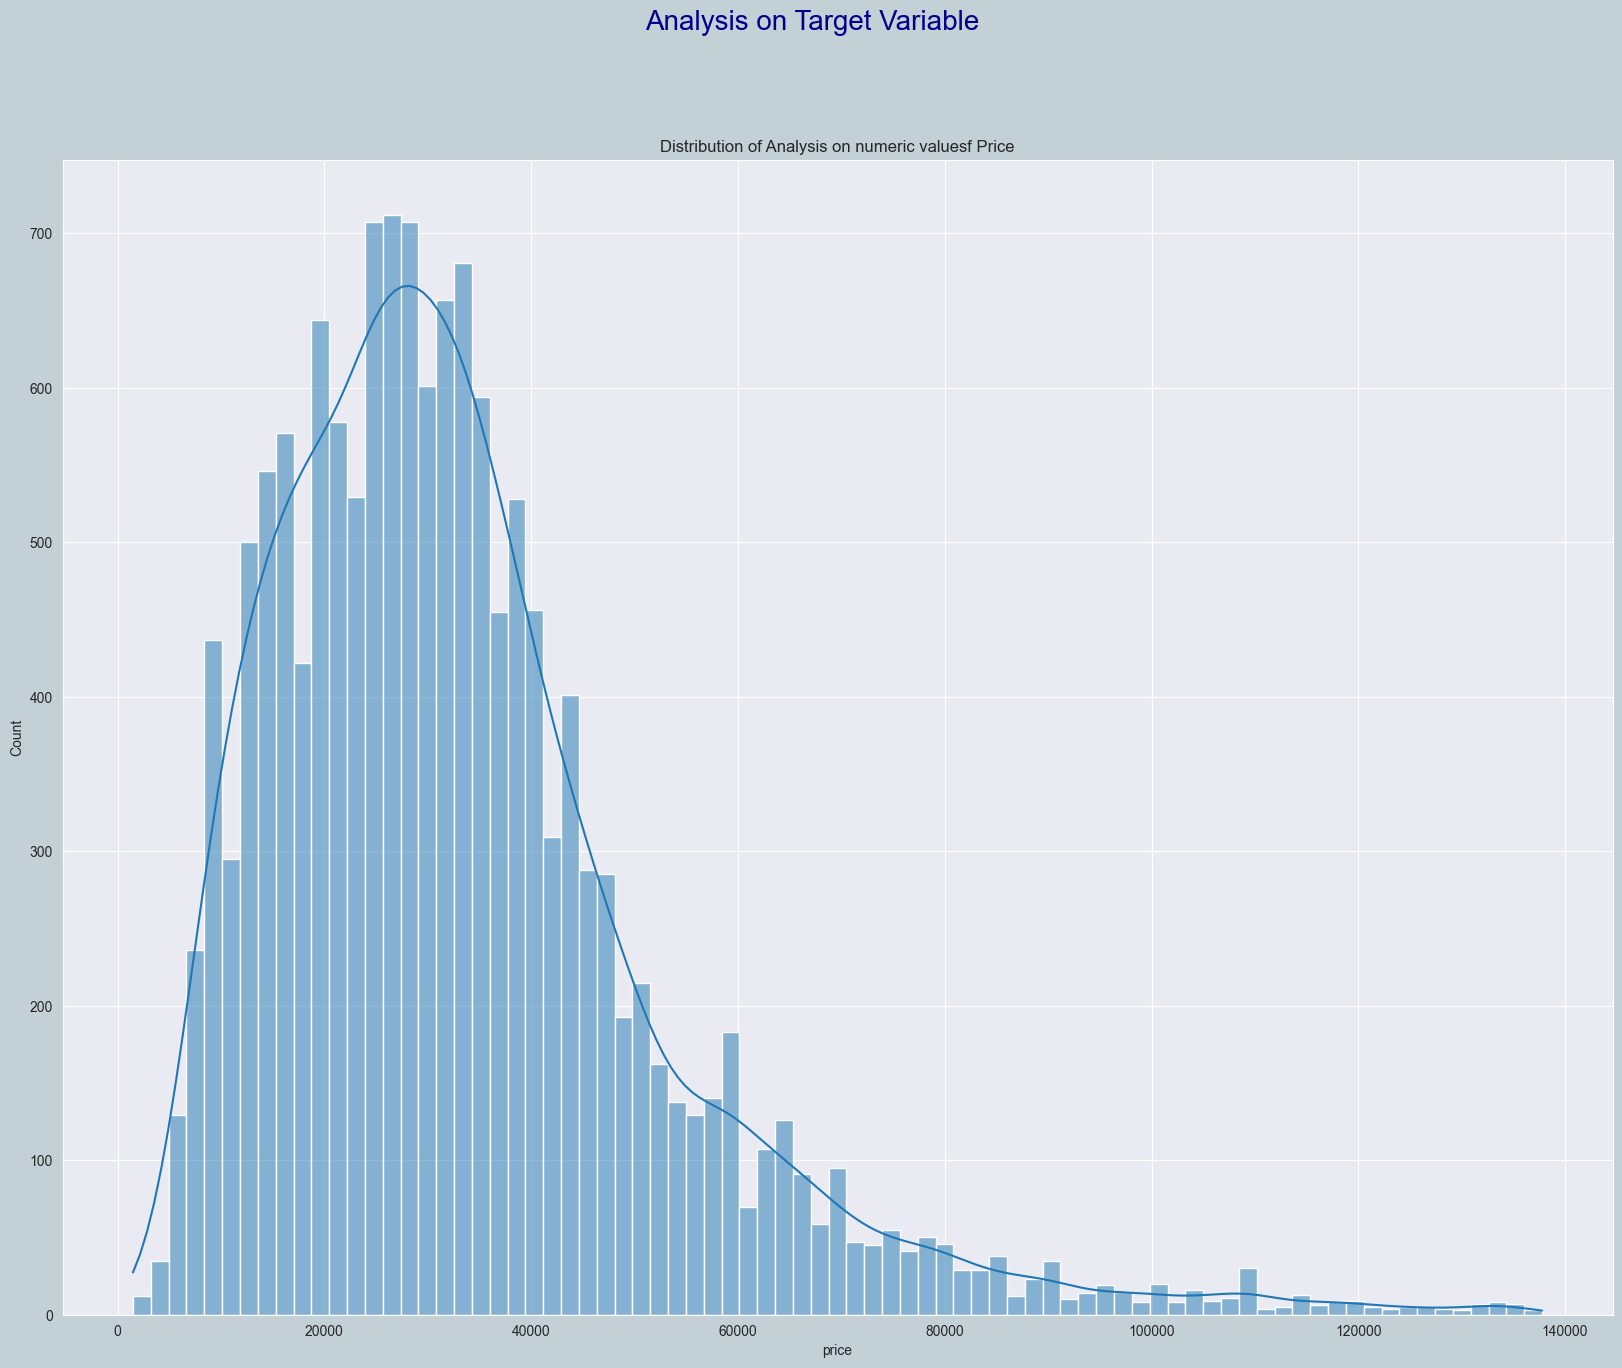

In [39]:
numFunc.target('price')

<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> For the target variable, we can see that the data does not has that extreme outliers
</ul>
</div>

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Feature Engineering__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">

Here, I will feature extract and do some form of feature engineer here

### One Hot Encoder

In [40]:
df_encode = pd.read_csv('train.csv')
df_encode = df_encode[selected_columns]
df_encode['Age'] = 2023 - df_encode['year']
df_encode

,brand,year,mileage,engine,engine_size,transmission,fuel_type,drivetrain,min_mpg,damaged,turbo,navigation_system,backup_camera,first_owner,price,Age
0,Mazda,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,Gasoline,Four-wheel Drive,NaN,0.0,1.0,0.0,1.0,0.0,36789,1.0
1,Alfa,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,Gasoline,Four-wheel Drive,NaN,0.0,1.0,1.0,1.0,0.0,39993,5.0
2,Chevrolet,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,Gasoline,Four-wheel Drive,NaN,0.0,0.0,0.0,0.0,1.0,46986,1.0
3,Land,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,Gasoline,Four-wheel Drive,NaN,0.0,1.0,1.0,1.0,1.0,141999,1.0
4,Mitsubishi,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,Gasoline,Front-wheel Drive,NaN,0.0,0.0,0.0,1.0,1.0,21595,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19104,Lexus,2017.0,77886.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,1.0,0.0,1.0,1.0,0.0,30023,6.0
19105,Chevrolet,2020.0,30921.0,6.2L V8 16V GDI OHV,6.2,10-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,0.0,0.0,0.0,1.0,1.0,42500,3.0
19106,Hyundai,2021.0,25490.0,3.8L V6 24V GDI DOHC,3.8,8-Speed Automatic,Gasoline,Four-wheel Drive,NaN,0.0,0.0,1.0,0.0,1.0,43999,2.0
19107,Honda,2019.0,30840.0,1.5L I4 16V GDI DOHC Turbo,1.5,Automatic CVT,Gasoline,Front-wheel Drive,29.0,1.0,1.0,0.0,1.0,1.0,26998,4.0


In [41]:
one_hot_encoded_data = pd.get_dummies(df_encode, columns = num_cols+['Age']) 
(one_hot_encoded_data)

,brand,engine,transmission,fuel_type,drivetrain,damaged,turbo,navigation_system,backup_camera,first_owner,...,Age_51.0,Age_52.0,Age_53.0,Age_54.0,Age_55.0,Age_56.0,Age_57.0,Age_58.0,Age_59.0,Age_61.0
0,Mazda,2.5L I4 16V GDI DOHC Turbo,6-Speed Automatic,Gasoline,Four-wheel Drive,0.0,1.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,Alfa,Twin Turbo Premium Unleaded V-6 2.9 L/176,Automatic,Gasoline,Four-wheel Drive,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,Chevrolet,5.3L V8 16V GDI OHV,Automatic,Gasoline,Four-wheel Drive,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,Land,3.0L I6 24V GDI DOHC Turbo,Automatic,Gasoline,Four-wheel Drive,0.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,Mitsubishi,2.0L I4 16V MPFI DOHC,Automatic CVT,Gasoline,Front-wheel Drive,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19104,Lexus,3.5L V6 24V PDI DOHC,8-Speed Automatic,Gasoline,Rear-wheel Drive,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
19105,Chevrolet,6.2L V8 16V GDI OHV,10-Speed Automatic,Gasoline,Rear-wheel Drive,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
19106,Hyundai,3.8L V6 24V GDI DOHC,8-Speed Automatic,Gasoline,Four-wheel Drive,0.0,0.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
19107,Honda,1.5L I4 16V GDI DOHC Turbo,Automatic CVT,Gasoline,Front-wheel Drive,1.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


### Standardisation

- Scale the data to between -1 and 1

In [42]:
scales = StandardScaler()
data = scales.fit_transform(df_encode[num_cols])
data

array([[ 0.84600991, -1.08053033, -0.08638263,         nan, -0.84600991],
       [ 0.04541006,  0.38579798, -0.01336134,         nan, -0.04541006],
       [ 0.84600991, -0.84850165,  0.42476639,         nan, -0.84600991],
       ...,
       [ 0.64585995, -0.58659107,  0.15093656,         nan, -0.64585995],
       [ 0.24556003, -0.44684623, -0.26893585,  1.35803694, -0.24556003],
       [-0.35488986,  1.62364999, -0.25068053,         nan,  0.35488986]])

### Feature Extraction

\begin{equation}
Age = Current Year - Produced Year
\end{equation}

In [43]:
df_encode['Age'] = 2023 - df_encode['year']
df_encode

,brand,year,mileage,engine,engine_size,transmission,fuel_type,drivetrain,min_mpg,damaged,turbo,navigation_system,backup_camera,first_owner,price,Age
0,Mazda,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,Gasoline,Four-wheel Drive,NaN,0.0,1.0,0.0,1.0,0.0,36789,1.0
1,Alfa,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,Gasoline,Four-wheel Drive,NaN,0.0,1.0,1.0,1.0,0.0,39993,5.0
2,Chevrolet,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,Gasoline,Four-wheel Drive,NaN,0.0,0.0,0.0,0.0,1.0,46986,1.0
3,Land,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,Gasoline,Four-wheel Drive,NaN,0.0,1.0,1.0,1.0,1.0,141999,1.0
4,Mitsubishi,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,Gasoline,Front-wheel Drive,NaN,0.0,0.0,0.0,1.0,1.0,21595,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19104,Lexus,2017.0,77886.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,1.0,0.0,1.0,1.0,0.0,30023,6.0
19105,Chevrolet,2020.0,30921.0,6.2L V8 16V GDI OHV,6.2,10-Speed Automatic,Gasoline,Rear-wheel Drive,16.0,0.0,0.0,0.0,1.0,1.0,42500,3.0
19106,Hyundai,2021.0,25490.0,3.8L V6 24V GDI DOHC,3.8,8-Speed Automatic,Gasoline,Four-wheel Drive,NaN,0.0,0.0,1.0,0.0,1.0,43999,2.0
19107,Honda,2019.0,30840.0,1.5L I4 16V GDI DOHC Turbo,1.5,Automatic CVT,Gasoline,Front-wheel Drive,29.0,1.0,1.0,0.0,1.0,1.0,26998,4.0


<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Model Baseline__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">

Here, I will feature extract and do some form of feature engineer here

### Set the Model

- Linear Regression
    - Formula for linear Regression: $$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
        - It can of different types such as multi, polynomial
    - Cost Function: $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- KNearest Neighbor Regressor
    - It approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood
    - Does not assume any specifc functional form, suitable for capturing any relationship
- Random forest Regressor
  - Ensemble method that combines multiple decision trees to make predictions which is robust to outliers and handle nonlinear relationships
- Decision Tree regressor
  - Tree like structure where each internal node represents a decision which can capture non linear relationship
- Gradient Boosting Regressor
  - Combines multiple weak learners to create a strong predictive model which optimises base on errors of previous iterations
- Ridge
  - Regularisation techniques for linear regression (L2 penalty)
- Lasso
  - Regularisation techniques for linear regression (L1 penalty)
- KernelRidge
  - Cmbines ridge regression with the kernel trick, allowing for non-linear relationships between the independent variables and the target variabl
  - Able to capture complex interactions and patterns
- Hist Gradient Boosting`
   - Similar to Gradient boosting but operates on histogram based gradients making in it efficient of rlarge dataset

  

### Creating the pipeline

In [44]:
class carAgeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        current_year = 2023
        return current_year - X

In [45]:
num_cols = num_cols[1:]

In [46]:
class pipeline:
    def __init__(self):
        pass

    def pipeline_step(self, original,num_features):
        preprocessor_pipe = Pipeline([
            ("num_var_imputer", MeanMedianImputer(imputation_method="median", variables= num_cols + binary_cols)),
            ("cat_var_imputer", CategoricalImputer(imputation_method="frequent", variables=cat_cols)),
            ("rare_label_encoder", RareLabelEncoder(
            tol=0.03, n_categories=2, variables=cat_cols)),
            ("one_hot_encoder", OneHotEncoder(
            variables=cat_cols, ignore_format=True)),
            ("scaling", StandardScaler()),
        ])
        process = [('preprocessing',preprocessor_pipe)]
        return process

p = pipeline()


### Setting the train and test data

In [47]:
X = df.drop('price',axis=1)
y = df['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=True, random_state=random_state
)

### Setting the evaluation metrics


- R2 Score (Focus)
  - The r2_score function computes the coefficient of determination,
usually denoted as R²
  - The best possible r2_score (perfect) is 1.0.In addition,r2_score can be negative (because the model can be arbitrarily
worse)
  - A constant model, disregarding the input features, would get
a R² score of 0.0
- Mean squared error 
  - Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss
  - MSE is almost always strictly positive (and not zero) due to the randomness or because the estimator does not account for information that could produce a more accurate estimate
- Root Mean Sqaure Error (Focus)
  - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit (From Statistics How To)
- Mean Absolute Percentage Error
  -  It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual


In [49]:
evaluation = ["r2", "neg_root_mean_squared_error", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error","neg_mean_squared_error"]
evaluation

['r2',
 'neg_root_mean_squared_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error']

In [50]:
# Setting the models
models = {
    'LinearReg': LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "RandomForestReg": RandomForestRegressor(),
    "DescisionTree": DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'ExtraTree': ExtraTreesRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    'XGB':XGBRegressor(),
    'CB':cb.CatBoostRegressor(loss_function='RMSE')
}
pipeline_step = p.pipeline_step(False,num_cols)
pipeline_step
# Making the last step empty for future purposes
pipeline_step.append(0)

In [51]:
class model:
    def __init__(self):
        pass
   
    def plot_learning_curve(self, name, model,X,y,ax,Original,types):
      # Learning curve to analyse train and test accuracy curve
        train_sizes, train_scores, test_scores = learning_curve(
            estimator=model, X=X, y=y,   cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1,scoring='neg_root_mean_squared_error')

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        # ax.set_ylim([-0.2, 1.2])
        ax.plot(train_sizes, train_mean, color='blue', marker='o',
                markersize=5, label='Training Accuracy')
        ax.fill_between(train_sizes, train_mean + train_std,
                        train_mean - train_std, alpha=0.15, color='blue')
        ax.plot(train_sizes, test_mean, color='green', marker='+',
                markersize=5, linestyle='--', label='Validation Accuracy')
        ax.fill_between(train_sizes, test_mean + test_std,
                        test_mean - test_std, alpha=0.15, color='green')
        if Original: 
          ax.set_title(f'Learning Curve {name} (Dummy)')
        else:
          ax.set_title(f'Learning Curve {name} ({types})')
        ax.set_xlabel('Training Data Size')
        ax.set_ylabel('Model accuracy')
        ax.grid()
        ax.legend(loc='lower right')

    def run_models(self,models,step,X,y):
      # Run the different models
        baseline_df = pd.DataFrame(columns = evaluation_col)
        for model_name,model in tqdm(models.items()):
            step[-1] = ('reg',model)
            print(colored(f'{model_name}', 'green'),'is running')
            reg = Pipeline(steps=step)
            reg.fit(X, y)
            print(f"Model Accuracy Score :{reg.score(X, y)}")
            scores = cross_validate(reg,X,y,cv=10,scoring=evaluation,n_jobs=5,return_train_score=True )
            scores = pd.DataFrame(scores)
            scores[['test_neg_root_mean_squared_error','train_neg_root_mean_squared_error', 'test_neg_mean_absolute_error','train_neg_mean_absolute_error','test_neg_mean_absolute_percentage_error','train_neg_mean_absolute_percentage_error','test_neg_mean_squared_error','train_neg_mean_squared_error']] = scores[['test_neg_root_mean_squared_error','train_neg_root_mean_squared_error', 'test_neg_mean_absolute_error','train_neg_mean_absolute_error','test_neg_mean_absolute_percentage_error','train_neg_mean_absolute_percentage_error','test_neg_mean_squared_error','train_neg_mean_squared_error']].applymap(np.abs)
            display((scores.mean()))
            new_row = dict(pd.DataFrame(scores).mean())
            new_row.update({'model':model_name})
            
            baseline_df = pd.concat([baseline_df, pd.DataFrame([new_row])], ignore_index=True)
            
        return baseline_df

    def model_graph(self,models,model_name,types):
      # Setting function for comparison subplot
      fig, ax = plt.subplots(2, 1, figsize=(8, 9))
      modelFunc.plot_learning_curve(model_name[0],models[0],X_train_original,y_train_original,ax[0],True,types[0])
      modelFunc.plot_learning_curve(model_name[1],models[1],X_train,y_train,ax[1],False,types[1])
      plt.show()
    def check_graph(self,ypred,model_name):
      # Checking for final validation and evluation 
      fig,ax = plt.subplots(1,2,figsize=(16,8))
      ax[0].scatter(y_test, ypred, c="red", marker="x", label="Predictions")
      ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "b--", label="Identity")
      a, b = np.polyfit(y_test, ypred, 1)
      ax[0].plot(y_test, a * y_test + b, "g-", label="Best Fit")
      ax[0].legend()
      ax[0].set_xlabel("True Values")
      ax[0].set_ylabel("Predictions")
      ax[0].title.set_text(f'Error plot ({model_name})')

      errors = y_test - ypred
      ax[1].scatter(range(len(errors)), errors)
      ax[1].axhline(y=0, color='r', linestyle='--')
      ax[1].set_xlabel('Predicted Values')
      ax[1].set_ylabel('Prediction Errors')
      ax[1].title.set_text(f'Residual plot ({model_name})')
      plt.show()
modelFunc = model()

In [52]:
# Setting the dataframe
def dataframeColumns(keys):
    col = ['model','fit_time','score_time']
    for i in keys:
        col.append(f'test_{i}')
        col.append(f'train_{i}')
    return col
evaluation_col = (dataframeColumns(evaluation))  
evaluation_col

['model',
 'fit_time',
 'score_time',
 'test_r2',
 'train_r2',
 'test_neg_root_mean_squared_error',
 'train_neg_root_mean_squared_error',
 'test_neg_mean_absolute_error',
 'train_neg_mean_absolute_error',
 'test_neg_mean_absolute_percentage_error',
 'train_neg_mean_absolute_percentage_error',
 'test_neg_mean_squared_error',
 'train_neg_mean_squared_error']

### Running the models

In [53]:
baseline2_df = modelFunc.run_models(models,pipeline_step,X_train,y_train)

  0%|          | 0/12 [00:00<?, ?it/s]

LinearReg is running
Model Accuracy Score :0.731899252565807


fit_time                                    1.828019e-01
score_time                                  3.313301e-02
test_r2                                     7.278026e-01
train_r2                                    7.320785e-01
test_neg_root_mean_squared_error            1.007048e+04
train_neg_root_mean_squared_error           1.000809e+04
test_neg_mean_absolute_error                6.614855e+03
train_neg_mean_absolute_error               6.578248e+03
test_neg_mean_absolute_percentage_error     2.593402e-01
train_neg_mean_absolute_percentage_error    2.580987e-01
test_neg_mean_squared_error                 1.015127e+08
train_neg_mean_squared_error                1.001631e+08
dtype: float64

  8%|▊         | 1/12 [00:02<00:27,  2.54s/it]

KNN is running
Model Accuracy Score :0.8715674581247321


fit_time                                    1.617875e-01
score_time                                  1.226323e-01
test_r2                                     7.967406e-01
train_r2                                    8.689654e-01
test_neg_root_mean_squared_error            8.700186e+03
train_neg_root_mean_squared_error           6.998970e+03
test_neg_mean_absolute_error                5.506883e+03
train_neg_mean_absolute_error               4.369596e+03
test_neg_mean_absolute_percentage_error     1.886295e-01
train_neg_mean_absolute_percentage_error    1.490283e-01
test_neg_mean_squared_error                 7.584297e+07
train_neg_mean_squared_error                4.898667e+07
dtype: float64

 17%|█▋        | 2/12 [00:04<00:23,  2.39s/it]

RandomForestReg is running
Model Accuracy Score :0.9842297707308694


fit_time                                    1.170196e+01
score_time                                  5.858378e-02
test_r2                                     8.840205e-01
train_r2                                    9.836681e-01
test_neg_root_mean_squared_error            6.575808e+03
train_neg_root_mean_squared_error           2.470873e+03
test_neg_mean_absolute_error                4.095156e+03
train_neg_mean_absolute_error               1.524856e+03
test_neg_mean_absolute_percentage_error     1.341992e-01
train_neg_mean_absolute_percentage_error    4.996365e-02
test_neg_mean_squared_error                 4.330923e+07
train_neg_mean_squared_error                6.105822e+06
dtype: float64

 25%|██▌       | 3/12 [00:40<02:37, 17.54s/it]

DescisionTree is running
Model Accuracy Score :1.0


fit_time                                    2.759784e-01
score_time                                  2.735832e-02
test_r2                                     7.833123e-01
train_r2                                    1.000000e+00
test_neg_root_mean_squared_error            8.992189e+03
train_neg_root_mean_squared_error           0.000000e+00
test_neg_mean_absolute_error                5.537747e+03
train_neg_mean_absolute_error               0.000000e+00
test_neg_mean_absolute_percentage_error     1.803079e-01
train_neg_mean_absolute_percentage_error    0.000000e+00
test_neg_mean_squared_error                 8.113401e+07
train_neg_mean_squared_error                0.000000e+00
dtype: float64

 33%|███▎      | 4/12 [00:41<01:28, 11.09s/it]

AdaBoost is running
Model Accuracy Score :0.3606525822909803


fit_time                                    1.004053e+00
score_time                                  4.630094e-02
test_r2                                     3.505282e-01
train_r2                                    3.640564e-01
test_neg_root_mean_squared_error            1.556237e+04
train_neg_root_mean_squared_error           1.541415e+04
test_neg_mean_absolute_error                1.377055e+04
train_neg_mean_absolute_error               1.370490e+04
test_neg_mean_absolute_percentage_error     6.669001e-01
train_neg_mean_absolute_percentage_error    6.649886e-01
test_neg_mean_squared_error                 2.423947e+08
train_neg_mean_squared_error                2.377370e+08
dtype: float64

 42%|████▏     | 5/12 [00:45<00:58,  8.40s/it]

GradientBoosting is running
Model Accuracy Score :0.8658761861556868


fit_time                                    2.036913e+00
score_time                                  4.118688e-02
test_r2                                     8.511848e-01
train_r2                                    8.668340e-01
test_neg_root_mean_squared_error            7.451021e+03
train_neg_root_mean_squared_error           7.055764e+03
test_neg_mean_absolute_error                4.855513e+03
train_neg_mean_absolute_error               4.668504e+03
test_neg_mean_absolute_percentage_error     1.607563e-01
train_neg_mean_absolute_percentage_error    1.553006e-01
test_neg_mean_squared_error                 5.558176e+07
train_neg_mean_squared_error                4.978508e+07
dtype: float64

 50%|█████     | 6/12 [00:51<00:46,  7.74s/it]

ExtraTree is running
Model Accuracy Score :0.9999999998640823


fit_time                                    9.909779e+00
score_time                                  7.288518e-02
test_r2                                     8.901358e-01
train_r2                                    1.000000e+00
test_neg_root_mean_squared_error            6.395634e+03
train_neg_root_mean_squared_error           3.622726e-01
test_neg_mean_absolute_error                3.935230e+03
train_neg_mean_absolute_error               6.692947e-03
test_neg_mean_absolute_percentage_error     1.301791e-01
train_neg_mean_absolute_percentage_error    8.555701e-07
test_neg_mean_squared_error                 4.094656e+07
train_neg_mean_squared_error                1.907249e-01
dtype: float64

 58%|█████▊    | 7/12 [01:22<01:15, 15.16s/it]

Ridge is running
Model Accuracy Score :0.7321054276297625


fit_time                                    1.150595e-01
score_time                                  2.932324e-02
test_r2                                     7.278361e-01
train_r2                                    7.322844e-01
test_neg_root_mean_squared_error            1.006973e+04
train_neg_root_mean_squared_error           1.000425e+04
test_neg_mean_absolute_error                6.614888e+03
train_neg_mean_absolute_error               6.579056e+03
test_neg_mean_absolute_percentage_error     2.595250e-01
train_neg_mean_absolute_percentage_error    2.582730e-01
test_neg_mean_squared_error                 1.014956e+08
train_neg_mean_squared_error                1.000862e+08
dtype: float64

 67%|██████▋   | 8/12 [01:22<00:42, 10.56s/it]

Lasso is running
Model Accuracy Score :0.7321052075986969


fit_time                                    4.916584e+00
score_time                                  2.992826e-02
test_r2                                     7.278352e-01
train_r2                                    7.322842e-01
test_neg_root_mean_squared_error            1.006976e+04
train_neg_root_mean_squared_error           1.000425e+04
test_neg_mean_absolute_error                6.614681e+03
train_neg_mean_absolute_error               6.578818e+03
test_neg_mean_absolute_percentage_error     2.594992e-01
train_neg_mean_absolute_percentage_error    2.582462e-01
test_neg_mean_squared_error                 1.014962e+08
train_neg_mean_squared_error                1.000863e+08
dtype: float64

 75%|███████▌  | 9/12 [01:51<00:48, 16.25s/it]

HistGradientBoosting is running
Model Accuracy Score :0.9220089437836029


fit_time                                    2.483957e+00
score_time                                  5.526710e-02
test_r2                                     8.907331e-01
train_r2                                    9.230715e-01
test_neg_root_mean_squared_error            6.381485e+03
train_neg_root_mean_squared_error           5.362666e+03
test_neg_mean_absolute_error                4.049429e+03
train_neg_mean_absolute_error               3.558673e+03
test_neg_mean_absolute_percentage_error     1.326562e-01
train_neg_mean_absolute_percentage_error    1.196993e-01
test_neg_mean_squared_error                 4.080097e+07
train_neg_mean_squared_error                2.875966e+07
dtype: float64

 83%|████████▎ | 10/12 [01:59<00:27, 13.74s/it]

XGB is running
Model Accuracy Score :0.9628800594568588


fit_time                                    3.983911e-01
score_time                                  5.325363e-02
test_r2                                     8.960914e-01
train_r2                                    9.650668e-01
test_neg_root_mean_squared_error            6.220456e+03
train_neg_root_mean_squared_error           3.613326e+03
test_neg_mean_absolute_error                3.915915e+03
train_neg_mean_absolute_error               2.526241e+03
test_neg_mean_absolute_percentage_error     1.276830e-01
train_neg_mean_absolute_percentage_error    8.642317e-02
test_neg_mean_squared_error                 3.880734e+07
train_neg_mean_squared_error                1.306048e+07
dtype: float64

 92%|█████████▏| 11/12 [02:01<00:10, 10.14s/it]

CB is running
Learning rate set to 0.060457
0:	learn: 18638.5075878	total: 149ms	remaining: 2m 28s
1:	learn: 17951.5796789	total: 152ms	remaining: 1m 15s
2:	learn: 17290.3139315	total: 155ms	remaining: 51.4s
3:	learn: 16665.7984364	total: 158ms	remaining: 39.3s
4:	learn: 16105.1082273	total: 161ms	remaining: 32s
5:	learn: 15581.5453576	total: 163ms	remaining: 27.1s
6:	learn: 15071.5118581	total: 166ms	remaining: 23.6s
7:	learn: 14620.0501392	total: 169ms	remaining: 21s
8:	learn: 14219.2803184	total: 172ms	remaining: 18.9s
9:	learn: 13810.1576794	total: 175ms	remaining: 17.3s
10:	learn: 13456.8422591	total: 177ms	remaining: 16s
11:	learn: 13085.1396318	total: 180ms	remaining: 14.8s
12:	learn: 12761.2542668	total: 182ms	remaining: 13.8s
13:	learn: 12443.7357942	total: 185ms	remaining: 13s
14:	learn: 12154.4501144	total: 187ms	remaining: 12.3s
15:	learn: 11887.1121985	total: 190ms	remaining: 11.7s
16:	learn: 11638.8271429	total: 192ms	remaining: 11.1s
17:	learn: 11415.2609551	total: 194ms

fit_time                                    5.516140e+00
score_time                                  5.315349e-02
test_r2                                     9.079881e-01
train_r2                                    9.486901e-01
test_neg_root_mean_squared_error            5.853851e+03
train_neg_root_mean_squared_error           4.379544e+03
test_neg_mean_absolute_error                3.691023e+03
train_neg_mean_absolute_error               2.998196e+03
test_neg_mean_absolute_percentage_error     1.198422e-01
train_neg_mean_absolute_percentage_error    1.002851e-01
test_neg_mean_squared_error                 3.432448e+07
train_neg_mean_squared_error                1.918235e+07
dtype: float64

100%|██████████| 12/12 [02:18<00:00, 11.51s/it]


### Analysing the results

In [54]:
baseline2_df.sort_values(by='test_r2',ascending=False).style.bar(subset =['test_r2','test_neg_root_mean_squared_error','test_neg_mean_absolute_error','test_neg_mean_absolute_percentage_error','test_neg_mean_squared_error'],color='green')

,model,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_mean_squared_error,train_neg_mean_squared_error
11,CB,5.516140,0.053153,0.907988,0.948690,5853.851180,4379.544362,3691.023374,2998.195734,0.119842,0.100285,34324481.876937,19182347.152228
10,XGB,0.398391,0.053254,0.896091,0.965067,6220.455916,3613.325774,3915.915031,2526.241080,0.127683,0.086423,38807336.955007,13060481.203262
9,HistGradientBoosting,2.483957,0.055267,0.890733,0.923071,6381.484614,5362.665842,4049.428998,3558.672704,0.132656,0.119699,40800973.526397,28759655.826735
6,ExtraTree,9.909779,0.072885,0.890136,1.000000,6395.633869,0.362273,3935.230406,0.006693,0.130179,0.000001,40946559.070764,0.190725
2,RandomForestReg,11.701957,0.058584,0.884021,0.983668,6575.807892,2470.872781,4095.156074,1524.855741,0.134199,0.049964,43309227.565913,6105822.234549
5,GradientBoosting,2.036913,0.041187,0.851185,0.866834,7451.020565,7055.763792,4855.512567,4668.504426,0.160756,0.155301,55581757.432878,49785083.487378
1,KNN,0.161788,0.122632,0.796741,0.868965,8700.185955,6998.969552,5506.882886,4369.596289,0.188629,0.149028,75842968.678045,48986665.803828
3,DescisionTree,0.275978,0.027358,0.783312,1.000000,8992.188964,0.000000,5537.747070,0.000000,0.180308,0.000000,81134008.635139,0.000000
7,Ridge,0.115060,0.029323,0.727836,0.732284,10069.733527,10004.250625,6614.888194,6579.056158,0.259525,0.258273,101495578.878852,100086212.090892
8,Lasso,4.916584,0.029928,0.727835,0.732284,10069.758864,10004.254723,6614.680679,6578.817915,0.259499,0.258246,101496155.923563,100086294.079245


<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> Here, we can see that CatBoost Performed the best across allo metrics with adaboost performing the worst
</ul>
</div>

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Hyperparameter Tuning__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">

Here, I will peform hyperparameter tuning 

In [55]:
preprocessor_pipe = Pipeline([
    ("num_var_imputer", MeanMedianImputer(imputation_method="median", variables= num_cols + binary_cols)),
    ("cat_var_imputer", CategoricalImputer(imputation_method="frequent", variables=cat_cols)),
    ("rare_label_encoder", RareLabelEncoder(
    tol=0.03, n_categories=2, variables=cat_cols)),
    ("one_hot_encoder", OneHotEncoder(
    variables=cat_cols, ignore_format=True)),
    ("scaling", StandardScaler()),
])


### Setting the Tuning Class

In [56]:
class Tuning:
    def __init__(self):
        pass

    def tune(self, param,model):
        pipeline_step = [('preprocessing',preprocessor_pipe),("tuning",RandomizedSearchCV( model, param, cv=StratifiedKFold(n_splits=10), n_jobs=-1, scoring="r2", n_iter=15))]
        tuned = Pipeline(steps=pipeline_step)
        tuned.fit(X_train, y_train)
        print(tuned.named_steps["tuning"].best_params_)
        return tuned
tune = Tuning()

### Random Forest Regressor

Here we tune the estmators, max depth min sample leaf and split

In [57]:
param_grid_rf = {
    'n_estimators': ['n_estimators', 10, 500, 10],
    'max_depth': [ 1, 20, 1],
    'min_samples_split': ['min_samples_split', 2, 10, 1],
    'min_samples_leaf': ['min_samples_leaf', 1, 5, 1],
}


In [58]:
rf_tuned_result = tune.tune(param_grid_rf,RandomForestRegressor())
(pd.DataFrame(rf_tuned_result['tuning'].cv_results_))

{'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092835,0.002796,0.002460,0.000614,10,10,1,1,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.275887,...,0.29366,0.292226,0.292618,0.279478,0.253499,0.299718,0.261337,0.278254,0.015159,1
1,0.006813,0.002083,0.000000,0.000000,10,min_samples_split,min_samples_leaf,20,"{'n_estimators': 10, 'min_samples_split': 'min...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,0.005653,0.000570,0.000000,0.000000,n_estimators,1,1,1,"{'n_estimators': 'n_estimators', 'min_samples_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.005511,0.000675,0.000000,0.000000,10,1,1,1,"{'n_estimators': 10, 'min_samples_split': 1, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,0.005414,0.000943,0.000000,0.000000,10,min_samples_split,5,1,"{'n_estimators': 10, 'min_samples_split': 'min...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5,0.005868,0.001716,0.000000,0.000000,n_estimators,10,5,20,"{'n_estimators': 'n_estimators', 'min_samples_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
6,0.094094,0.005224,0.002267,0.000348,10,10,5,1,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.268038,...,0.29909,0.279351,0.289919,0.280444,0.257218,0.301760,0.255282,0.275910,0.015987,2
7,0.006328,0.001498,0.000000,0.000000,10,1,1,1,"{'n_estimators': 10, 'min_samples_split': 1, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
8,0.006238,0.002352,0.000000,0.000000,10,2,min_samples_leaf,20,"{'n_estimators': 10, 'min_samples_split': 2, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
9,0.005628,0.002031,0.000000,0.000000,10,2,min_samples_leaf,1,"{'n_estimators': 10, 'min_samples_split': 2, '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [59]:
pipeline_step[-1] = ("reg", rf_tuned_result.named_steps["tuning"].best_estimator_)
rf_tuned = Pipeline(steps=pipeline_step)
rf_tuned.fit(X_train, y_train)
rf_tuned_y_pred = rf_tuned.predict(X_test)
scores = pd.DataFrame(cross_validate(rf_tuned,X_train,y_train,cv=StratifiedKFold(n_splits=10),scoring=evaluation))

In [60]:
scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,0.124895,0.026859,0.274534,-15885.619586,-11569.779387,-0.437624,-2.523529e+08
1,0.138911,0.027892,0.261764,-17413.275801,-12309.209661,-0.469319,-3.032222e+08
2,0.143089,0.026777,0.273037,-16555.308351,-11655.625345,-0.453774,-2.740782e+08
3,0.147421,0.026848,0.294493,-15686.783831,-11491.394199,-0.465328,-2.460752e+08
4,0.154251,0.025644,0.278368,-16542.062855,-12136.841582,-0.486018,-2.736398e+08
5,0.128859,0.025928,0.297047,-15621.269966,-11569.377558,-0.465232,-2.440241e+08
6,0.173975,0.041947,0.273090,-16577.938128,-11929.797497,-0.470043,-2.748280e+08
7,0.150465,0.028181,0.265706,-16422.639412,-11798.853513,-0.468439,-2.697031e+08
8,0.148286,0.030048,0.302640,-16272.394226,-11648.829531,-0.473264,-2.647908e+08
9,0.140053,0.055159,0.255204,-17301.079463,-12191.126321,-0.469473,-2.993274e+08


<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> From the scores, not much improvement was seen
</ul>
</div>

### CatBoost

In [61]:
cb_prarams_grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [62]:
cb_tuned_result = tune.tune(cb_prarams_grid,(cb.CatBoostRegressor(loss_function='RMSE')))
(pd.DataFrame(cb_tuned_result['tuning'].cv_results_))

0:	learn: 18037.3427485	total: 6.2ms	remaining: 923ms
1:	learn: 16876.1738565	total: 11.1ms	remaining: 818ms
2:	learn: 15815.9901194	total: 16ms	remaining: 783ms
3:	learn: 14833.4943599	total: 21ms	remaining: 767ms
4:	learn: 14022.9999248	total: 26.2ms	remaining: 760ms
5:	learn: 13282.9424751	total: 30.7ms	remaining: 738ms
6:	learn: 12657.5831782	total: 34.8ms	remaining: 711ms
7:	learn: 12054.5506282	total: 39.4ms	remaining: 699ms
8:	learn: 11534.8747130	total: 44ms	remaining: 689ms
9:	learn: 11087.8215826	total: 49.5ms	remaining: 693ms
10:	learn: 10659.0941834	total: 54.8ms	remaining: 692ms
11:	learn: 10299.8157221	total: 59.9ms	remaining: 688ms
12:	learn: 9949.8459783	total: 64.9ms	remaining: 684ms
13:	learn: 9693.8230215	total: 70ms	remaining: 680ms
14:	learn: 9422.8412801	total: 74.7ms	remaining: 672ms
15:	learn: 9207.5343982	total: 79.9ms	remaining: 669ms
16:	learn: 8993.3429989	total: 85ms	remaining: 665ms
17:	learn: 8810.0191066	total: 90.1ms	remaining: 661ms
18:	learn: 8644.205

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_l2_leaf_reg,param_iterations,param_depth,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,18.381379,5.572982,0.035323,0.010781,0.03,1,200,8,"{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'ite...",0.869414,...,0.874574,0.862218,0.871024,0.867190,0.867371,0.872812,0.868624,0.869337,0.004853,7
1,10.835129,3.417493,0.060466,0.013248,0.1,0.2,200,6,"{'learning_rate': 0.1, 'l2_leaf_reg': 0.2, 'it...",0.898666,...,0.899707,0.889902,0.902129,0.899588,0.888443,0.899860,0.893601,0.895657,0.004671,2
2,7.490717,0.644068,0.048551,0.017574,0.1,1,200,4,"{'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iter...",0.867887,...,0.876989,0.873946,0.880051,0.874167,0.867233,0.876798,0.875047,0.872742,0.004857,5
3,6.078911,1.048511,0.055460,0.013406,0.1,0.5,200,4,"{'learning_rate': 0.1, 'l2_leaf_reg': 0.5, 'it...",0.874611,...,0.874132,0.871609,0.879874,0.874455,0.868048,0.876482,0.873235,0.872572,0.004296,6
4,4.265186,0.492639,0.066106,0.010970,0.03,1,200,2,"{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'ite...",0.754009,...,0.772528,0.766203,0.769678,0.757688,0.752290,0.768760,0.760038,0.761293,0.010087,15
5,4.784711,0.793236,0.050924,0.016000,0.1,0.5,150,4,"{'learning_rate': 0.1, 'l2_leaf_reg': 0.5, 'it...",0.862661,...,0.864210,0.861592,0.866669,0.862474,0.858791,0.868350,0.864356,0.862271,0.004156,8
6,5.845367,0.309341,0.035031,0.005410,0.1,0.2,200,4,"{'learning_rate': 0.1, 'l2_leaf_reg': 0.2, 'it...",0.873135,...,0.876469,0.871075,0.882507,0.877431,0.866618,0.880648,0.877295,0.873745,0.005792,4
7,9.916872,2.492598,0.034066,0.005277,0.1,1,150,8,"{'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iter...",0.897576,...,0.901494,0.888021,0.904495,0.898680,0.895496,0.896638,0.898416,0.897914,0.005057,1
8,10.461455,1.376667,0.033338,0.007202,0.03,1,150,8,"{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'ite...",0.856178,...,0.862657,0.850364,0.857590,0.854043,0.855757,0.861440,0.854650,0.856727,0.005233,9
9,2.986863,0.351851,0.033166,0.007525,0.03,1,150,4,"{'learning_rate': 0.03, 'l2_leaf_reg': 1, 'ite...",0.799941,...,0.813151,0.804132,0.809400,0.806341,0.799588,0.815190,0.806542,0.805471,0.009087,12


In [63]:
pipeline_step[-1] = ("reg", cb_tuned_result.named_steps["tuning"].best_estimator_)
cb_tuned = Pipeline(steps=pipeline_step)
cb_tuned.fit(X_train, y_train)
cb_tuned_y_pred = cb_tuned.predict(X_test)
scores = pd.DataFrame(cross_validate(cb_tuned,X_train,y_train,cv=StratifiedKFold(n_splits=10),scoring=evaluation))

0:	learn: 18037.3427485	total: 4.87ms	remaining: 725ms
1:	learn: 16876.1738565	total: 10.5ms	remaining: 776ms
2:	learn: 15815.9901194	total: 15.5ms	remaining: 759ms
3:	learn: 14833.4943599	total: 20ms	remaining: 730ms
4:	learn: 14022.9999248	total: 25.2ms	remaining: 730ms
5:	learn: 13282.9424751	total: 30ms	remaining: 720ms
6:	learn: 12657.5831782	total: 34.6ms	remaining: 706ms
7:	learn: 12054.5506282	total: 39.5ms	remaining: 701ms
8:	learn: 11534.8747130	total: 44.4ms	remaining: 695ms
9:	learn: 11087.8215826	total: 48.7ms	remaining: 682ms
10:	learn: 10659.0941834	total: 53.2ms	remaining: 673ms
11:	learn: 10299.8157221	total: 58.1ms	remaining: 668ms
12:	learn: 9949.8459783	total: 62.9ms	remaining: 663ms
13:	learn: 9693.8230215	total: 67.4ms	remaining: 655ms
14:	learn: 9422.8412801	total: 72ms	remaining: 648ms
15:	learn: 9207.5343982	total: 77ms	remaining: 645ms
16:	learn: 8993.3429989	total: 81.6ms	remaining: 639ms
17:	learn: 8810.0191066	total: 86.7ms	remaining: 636ms
18:	learn: 8644.

In [64]:
scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error,test_neg_mean_squared_error
0,1.092678,0.034154,0.898863,-5931.304540,-3853.654399,-0.121309,-3.518037e+07
1,0.975847,0.031046,0.906051,-6211.975057,-3976.627399,-0.129250,-3.858863e+07
2,0.940898,0.032591,0.893688,-6330.986766,-3976.832426,-0.129917,-4.008139e+07
3,0.969807,0.030643,0.903777,-5793.263258,-3823.214547,-0.130491,-3.356190e+07
4,1.003014,0.035189,0.886633,-6556.535654,-4149.592008,-0.134185,-4.298816e+07
5,0.985171,0.033559,0.905862,-5716.573636,-3823.982576,-0.128456,-3.267921e+07
6,0.944322,0.031048,0.896994,-6240.516636,-3850.807631,-0.122662,-3.894405e+07
7,1.009069,0.029647,0.894470,-6225.812660,-3927.288580,-0.130574,-3.876074e+07
8,1.023161,0.031118,0.895062,-6312.312310,-4089.334522,-0.135870,-3.984529e+07
9,0.994322,0.041064,0.894454,-6512.930596,-4079.292552,-0.129248,-4.241826e+07


<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> From the scores, the r2 score improved slightly and therefore it is the final mdoel
</ul>
</div>

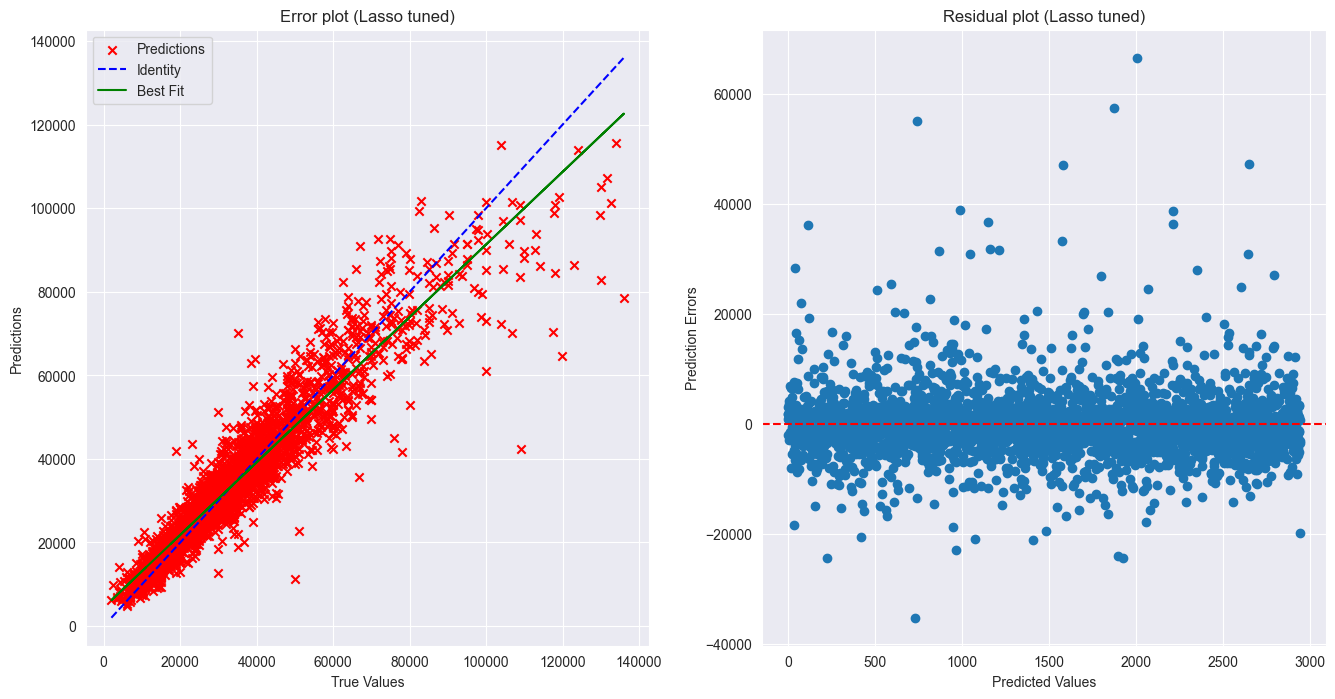

In [65]:
modelFunc.check_graph(cb_tuned_y_pred,'Lasso tuned')

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Testing Model__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


In [66]:
test_df = pd.read_csv('test.csv')
test_df = test_df[selected_columns]
test_df = test_df.dropna()
test_df['Age'] = 2023 - test_df['year']

In [67]:
test_df.dropna(subset=['price'], inplace=True)
test_df = test_df[test_df['price'].str.isnumeric()]
test_df['price'] = test_df['price'].astype(float)
test_df = test_df[test_df['price'] < df['price'].quantile(0.99)]
test_df = test_df[test_df['engine_size'] < outlier_engine_size]

In [70]:
X_test = test_df.drop(target_var, axis=1)
y_test = test_df[target_var]
print(X_test.shape)
X_test_transformed = preprocessor_pipe.transform(X_test)

(3651, 15)


In [71]:
def eval_model(y_valid, y_pred):
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    print(f"RMSE: {rmse:.3f}")
    r2= r2_score(y_valid, y_pred)
    print(f"r2_score: {r2:.3f}")

In [72]:
y_pred = cb_tuned.predict(X_test)
eval_model(y_test, y_pred)

RMSE: 5427.630
r2_score: 0.901


<div style="background-color: #00CED1; border: 2px solid #4CAF50; border-radius: 5px; padding: 15px; color: #333; font-size: 16px; text-align: center; box-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
<u><b><i>Things Observed</i></b></u>
<ul>
  <li> From the scores, model produce the same result on the test dataset


  
</ul>
</div>

<a class="anchor" id="1"></a>
## <font color='#3863ba'> __Saving Model__</font>
<hr style="height:1.5px;border-width:0;background-color: #4c8c95">


In [73]:
import joblib
filename = 'finalized_model.pkl'
joblib.dump(cb_tuned, filename)

['finalized_model.pkl']

In [4]:
import joblib
filename = 'finalized_model.pkl'

# Load the model from the file
loaded_model = joblib.load(filename)

### Feature Importace

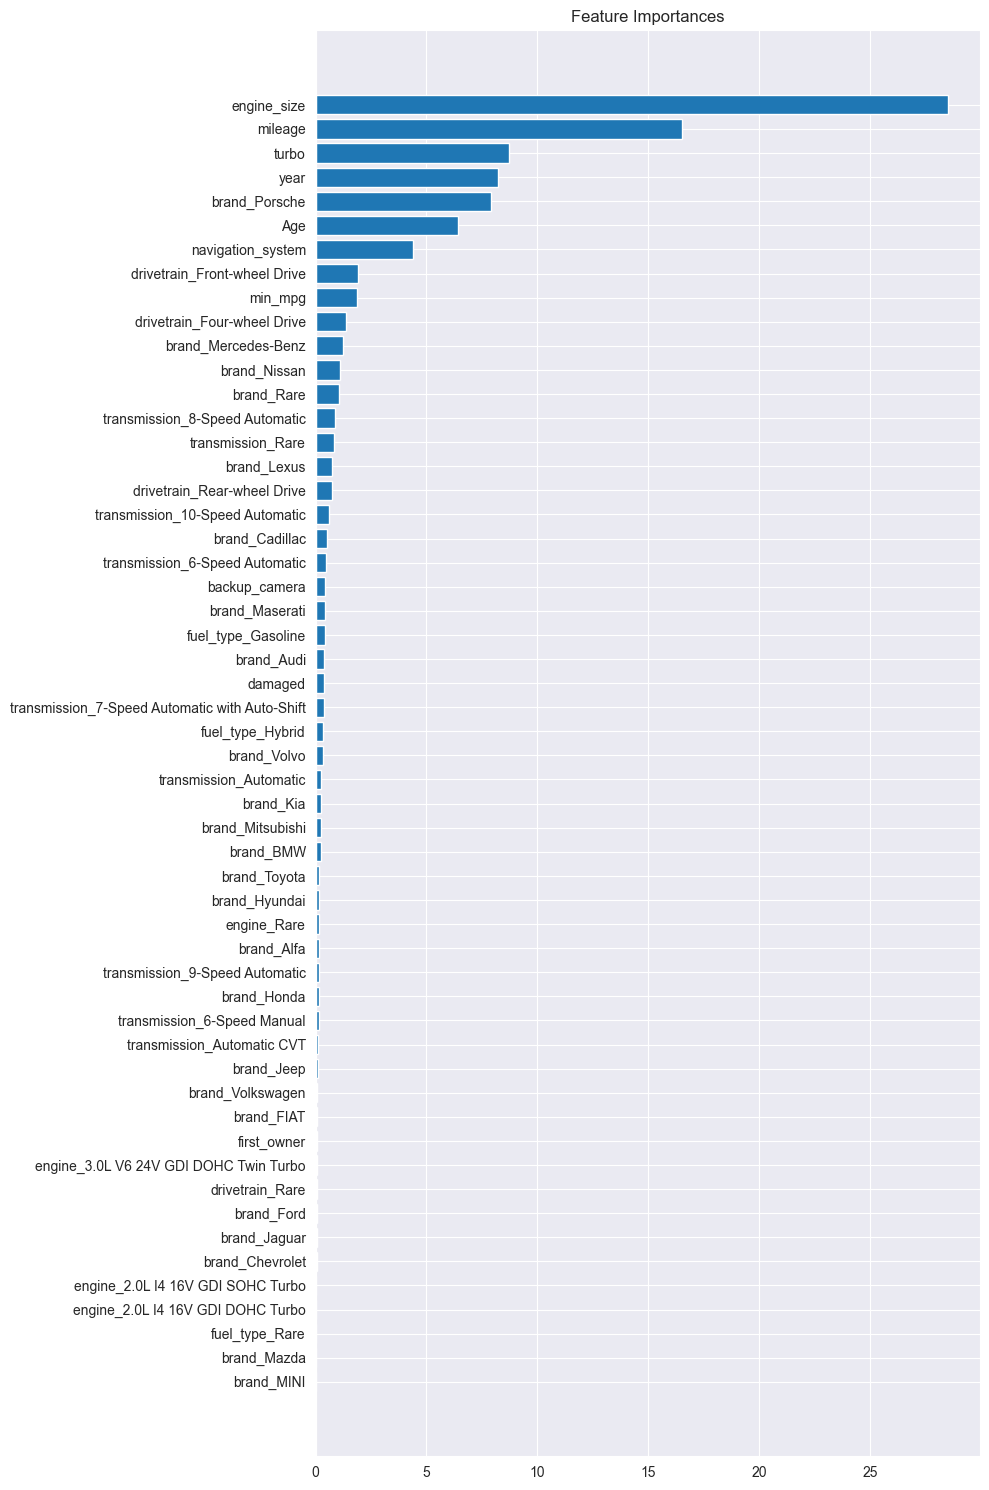

In [25]:
# Load the pipeline
filename = 'finalized_model.pkl'
pipeline = joblib.load(filename)

def get_feature_names(pipeline):
    feature_names = None
    for name, transformer in pipeline.steps[:-1]:
        if hasattr(transformer, 'get_feature_names_out'):
            try:
                feature_names = transformer.get_feature_names_out()
            except TypeError:
                if feature_names is not None:
                    feature_names = transformer.get_feature_names_out(feature_names)
                else:
                    raise ValueError(f"Transformer {name} does not support get_feature_names_out without input feature names.")
        elif hasattr(transformer, 'get_feature_names'):
            feature_names = transformer.get_feature_names()
        elif hasattr(transformer, 'feature_names_in_'):
            feature_names = transformer.feature_names_in_
        else:
            if feature_names is None:
                raise ValueError(f"The transformer {name} does not provide feature names. You need to implement custom logic to get feature names.")
    return feature_names


feature_names = get_feature_names(pipeline)

model = pipeline.named_steps['reg']  
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_

    indices = np.argsort(importances)[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]
    plt.figure(figsize=(10, 15))
    plt.title('Feature Importances')
    plt.barh(range(len(importances)), importances[indices], align='center')
    plt.yticks(range(len(importances)), sorted_feature_names)
    plt.gca().invert_yaxis()  # Invert the y-axis to have the highest importance at the top
    plt.tight_layout()
    plt.show()
else:
    print("The CatBoostRegressor does not have a feature_importances_ attribute.")
